In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [13]:
data=pd.read_csv("datasets/country_wise_latest.csv")

In [14]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Confirmed               182 non-null    int64  
 1   Deaths                  182 non-null    int64  
 2   Recovered               182 non-null    int64  
 3   Active                  182 non-null    int64  
 4   New cases               182 non-null    int64  
 5   New deaths              182 non-null    int64  
 6   New recovered           182 non-null    int64  
 7   Deaths / 100 Cases      182 non-null    float64
 8   Recovered / 100 Cases   182 non-null    float64
 9   Deaths / 100 Recovered  182 non-null    float64
 10  Confirmed last week     182 non-null    int64  
 11  1 week change           182 non-null    int64  
 12  1 week % increase       182 non-null    float64
 13  Result                  182 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 20.0 KB


In [15]:
data.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,Result
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,1
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,0
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,1
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,0
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,1


In [16]:
data.tail()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,Result
177,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,1
178,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,0
179,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,1
180,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,0
181,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,1


In [17]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,Result
count,1.820000e+02,182.000000,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,182.000000,182.000000,182.000000
mean,8.933031e+04,3509.879121,5.202246e+04,3.379797e+04,1248.054945,29.615385,959.467033,2.972308,66.601319,40.558297,7.966686e+04,9663.450549,13.647912,0.505495
std,3.884323e+05,14280.398555,1.926084e+05,2.161344e+05,5786.513060,121.614850,4252.395043,3.458736,24.307913,336.669357,3.427795e+05,48124.010700,24.791266,0.501349
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,-47.000000,-3.840000,0.000000
25%,1.107000e+03,18.250000,7.190000e+02,1.317500e+02,4.000000,0.000000,0.000000,0.942500,51.770000,1.442500,1.045250e+03,47.000000,2.762500,0.000000
50%,4.970000e+03,103.500000,3.220000e+03,1.599000e+03,49.000000,1.000000,24.000000,2.130000,72.270000,3.580000,4.784000e+03,418.000000,6.890000,1.000000
75%,3.967625e+04,718.250000,2.333350e+04,8.696000e+03,419.750000,5.750000,228.250000,3.715000,87.282500,6.232500,3.658350e+04,3248.500000,16.927500,1.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,3259.260000,3.834677e+06,455582.000000,226.320000,1.000000


In [18]:
data.isnull().sum()

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
Result                    0
dtype: int64

### This is perfect. We have not any missing values :))

In [19]:
data.dtypes

Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
Result                      int64
dtype: object

###  Data Visualization


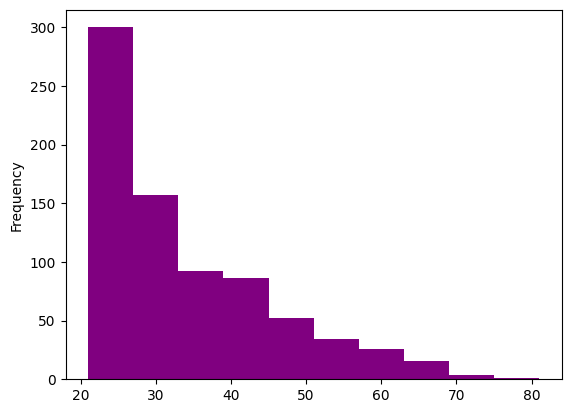

In [25]:
data.Age.plot(color="purple",kind="hist")
plt.show()

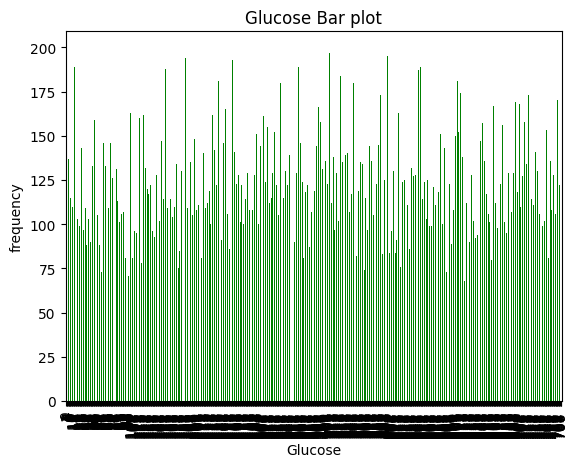

In [27]:
data.Glucose.plot(color="green",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

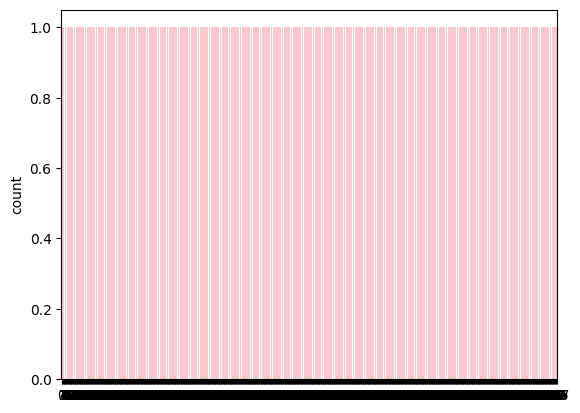

In [29]:
sns.countplot(data=data["Glucose"],color="pink")
plt.show()

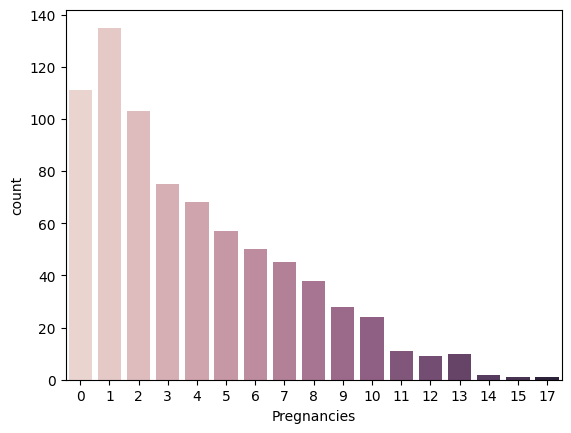

In [42]:
sns.countplot(data=data, x="Pregnancies", hue="Pregnancies", legend=False)
plt.show()

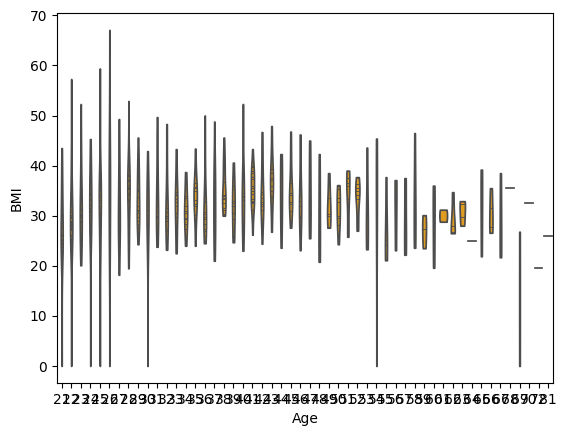

In [60]:
sns.violinplot(data=data,x="Age",y="BMI", color="orange",split=False,cut=0, inner="stick")
plt.show()

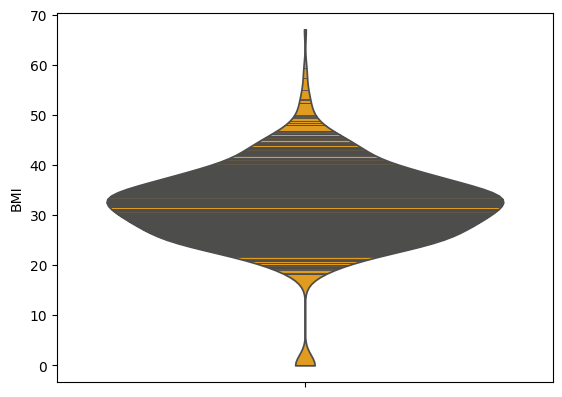

In [61]:
sns.violinplot ( data= data ["BMI"], color="orange", split=False, cut=0, inner="stick")
plt.show()
#Showing boxplot, Median, Interquartile range and whiskers

In [62]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

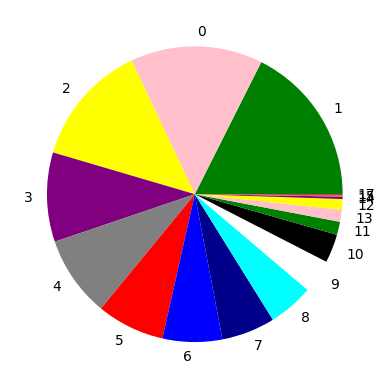

In [63]:
sizes=data.Pregnancies.value_counts().values
labels=data.Pregnancies.value_counts().index
colors=["green","pink","yellow","purple","grey","red","blue","darkblue","cyan","white","black"]
plt.pie(sizes,data=data,labels=labels,colors=colors)
plt.show()

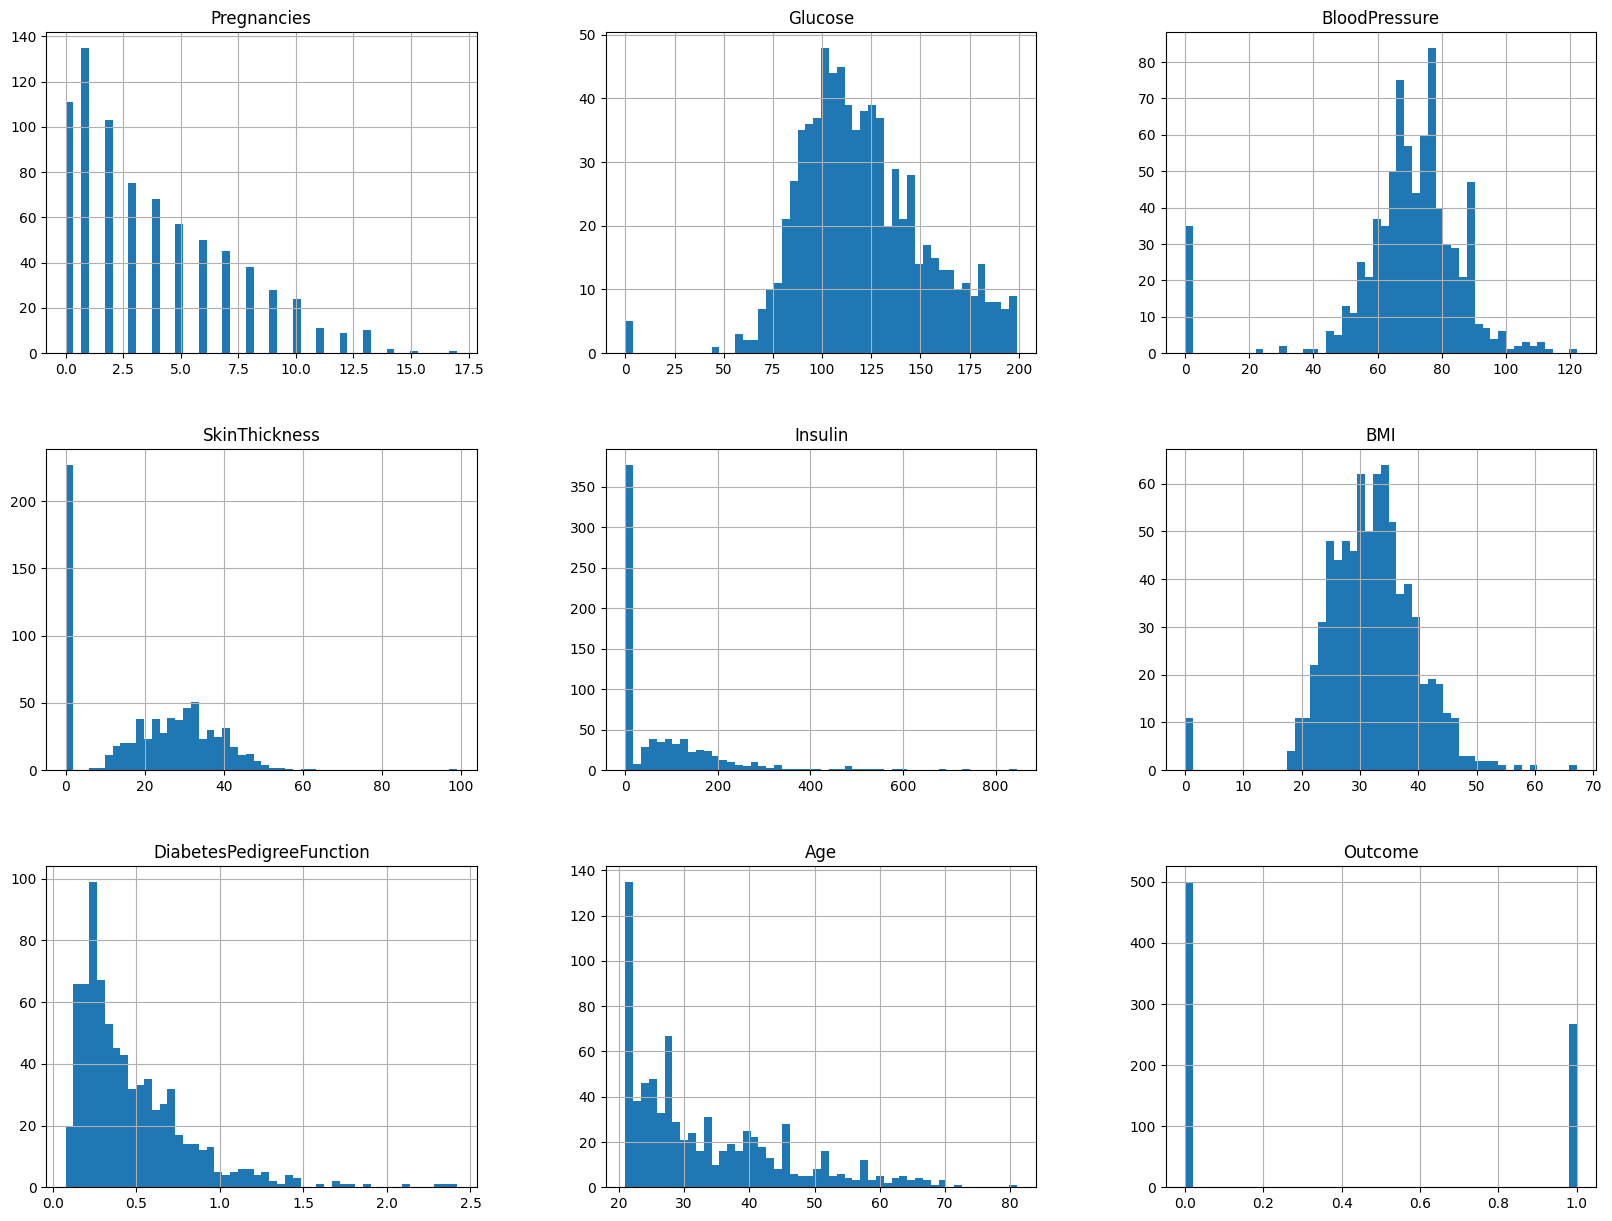

In [64]:
data.hist(bins=50, figsize=(20,15)) 
plt.show()

In [65]:
# let's look at the Corralation matrix of this data
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

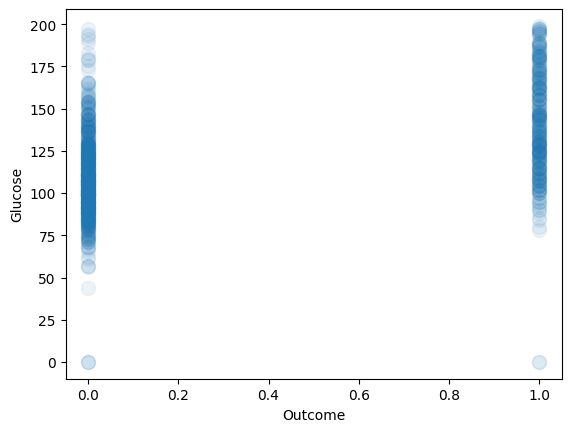

In [69]:
data.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)
plt.show()

### ***As you can see, the amount of Glucose is significant for the consequence***
***So, Let's move on and prepate our data*** 

# Prepare the data

In [20]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)    # Create, random train and test set


train_df_labels = train_df["Result"].copy()
# Drop labels
train_df= train_df.drop("Result", axis=1)


In [21]:
#Transformation Pipelines 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
# This method makes normalization to our features

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

## Predictions

***Let's make some predictions***

#### Stochastic Gradient Descent (SGD)

In [22]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_df_labels)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.51020408, 0.60416667, 0.52083333])

In [24]:
prediction = sgd_clf.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_clf.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.5655172413793104


In [ ]:
#TODO: Write code for veryfying with the test data

In [28]:
#Real Testing
real_test_input = np.array(
[
[3369, 15, 2547, 807, 67, 0, 19, 0.45, 75.6, 0.59, 2999, 370, 12.34]
]
)
# features: Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age


prediction = sgd_clf.predict(real_test_input)
print(f"Prediction: {prediction}")
# Expected Output: [1]
# Actual  Output:  [1]


Prediction: [1]
